## Data Exploration and Cleaning of AHS'23 - Bryan's Notebook 2


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initially loaded cols
# OMB13CBSA, HHAGE, HHRACE, HHGRAD, MILHH, DISHH, TENURE, HINCP, PERPOVLVL, FINCP, FS, TOTHCAMT,
# HINOWHERE, HIHMLESSNESS, HINUMOVE, HIBEHINDFRQ



# df = pd.read_csv(
#     "ahs2023n.csv",
#     usecols=[
#         "HHAGE",
#         "HHGRAD",
#         "MILHH",
#         "DISHH",
#         "ADEQUACY",
#         "TENURE",
#         "HINCP",
#         "PERPOVLVL",
#         "FINCP",
#         "FS",
#         "TOTHCAMT",
#         "HINOWHERE",
#         "HIHMLESSNESS",
#         "HINUMOVE",
#         "HIBEHINDFRQ",
#     ],
# )


df = pd.read_csv("1-separated_columns.csv")
df.describe()


,Unnamed: 0,HHAGE,HINCP,PERPOVLVL,FINCP,TOTHCAMT
count,55669.000000,55669.000000,5.566900e+04,55669.000000,5.566900e+04,55669.000000
mean,27834.000000,46.662918,9.038242e+04,262.897861,8.664787e+04,1570.634339
std,16070.400405,25.748713,1.431041e+05,194.072612,1.402975e+05,2440.500225
min,0.000000,-6.000000,-5.000000e+03,-6.000000,-5.000000e+03,-6.000000
25%,13917.000000,33.000000,1.380000e+04,79.000000,1.300000e+04,496.000000
50%,27834.000000,51.000000,5.200000e+04,256.000000,4.980000e+04,1166.000000
75%,41751.000000,66.000000,1.150000e+05,501.000000,1.088000e+05,2063.000000
max,55668.000000,85.000000,6.445000e+06,501.000000,6.405000e+06,101058.000000


In [45]:
df.dtypes


Unnamed: 0       int64
OMB13CBSA       object
HHAGE            int64
HHRACE          object
HHGRAD          object
MILHH           object
DISHH           object
TENURE          object
HINCP            int64
PERPOVLVL        int64
FINCP            int64
FS              object
TOTHCAMT         int64
HINOWHERE       object
HIHMLESSNESS    object
HINUMOVE        object
HIBEHINDFRQ     object
dtype: object

### Casting Columns to Ints


In [3]:
columns = [
    "HHAGE",
    "HHRACE",
    "HHGRAD",
    "MILHH",
    "DISHH",
    "TENURE",
    "HINCP",
    "PERPOVLVL",
    "FINCP",
    "FS",
    "TOTHCAMT",
    "HINOWHERE",
    "HIHMLESSNESS",
    "HINUMOVE",
    "HIBEHINDFRQ",
]


for col in columns:

    if col in df.columns:

        # Remove single quotes and convert to integer (using Int64 to preserve NaN values)

        df[col] = pd.to_numeric(
            df[col].astype(str).str.replace("'", ""), errors="coerce"
        ).astype(
            int
        )  # Int64 is pandas nullable integer type

df["OMB13CBSA"] = df["OMB13CBSA"].str.replace("'", "")


In [4]:
df.dtypes


Unnamed: 0       int64
OMB13CBSA       object
HHAGE            int64
HHRACE           int64
HHGRAD           int64
MILHH            int64
DISHH            int64
TENURE           int64
HINCP            int64
PERPOVLVL        int64
FINCP            int64
FS               int64
TOTHCAMT         int64
HINOWHERE        int64
HIHMLESSNESS     int64
HINUMOVE         int64
HIBEHINDFRQ      int64
dtype: object

In [5]:
df.head(5)


,Unnamed: 0,OMB13CBSA,HHAGE,HHRACE,HHGRAD,MILHH,DISHH,TENURE,HINCP,PERPOVLVL,FINCP,FS,TOTHCAMT,HINOWHERE,HIHMLESSNESS,HINUMOVE,HIBEHINDFRQ
0,0,99998,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6
1,1,99998,21,1,39,6,1,2,48000,199,48000,2,1093,0,0,1,6
2,2,99998,76,1,47,4,1,1,292500,501,292500,-6,810,0,0,0,-6
3,3,99998,32,1,39,6,2,1,56000,232,56000,2,489,-6,-6,-6,-6
4,4,99998,64,2,40,6,1,2,36000,231,36000,-6,845,0,0,0,2


#### Creation of Total Housing Costs (TOTHCAMT) as Percentage of Household Income (HINCP) - housing_cost_percentage


In [6]:
import numpy as np

tothcamt = df["TOTHCAMT"]
hincp = df["HINCP"]

# Handle tenure values which might also have quotes
tenure_values = df["TENURE"]

# Create the new column with housing cost percentage
df["housing_cost_percentage"] = np.nan  # Initialize with NaN

# Calculate percentage only for valid cases
mask = (hincp > 0) & (tenure_values > 0)
if mask.any():
    df.loc[mask, "housing_cost_percentage"] = np.round(
        (tothcamt[mask] / (hincp[mask] / 12)) * 100
    )


In [7]:
df.head(100)


,Unnamed: 0,OMB13CBSA,HHAGE,HHRACE,HHGRAD,MILHH,DISHH,TENURE,HINCP,PERPOVLVL,FINCP,FS,TOTHCAMT,HINOWHERE,HIHMLESSNESS,HINUMOVE,HIBEHINDFRQ,housing_cost_percentage
0,0,99998,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,NaN
1,1,99998,21,1,39,6,1,2,48000,199,48000,2,1093,0,0,1,6,27.0
2,2,99998,76,1,47,4,1,1,292500,501,292500,-6,810,0,0,0,-6,3.0
3,3,99998,32,1,39,6,2,1,56000,232,56000,2,489,-6,-6,-6,-6,10.0
4,4,99998,64,2,40,6,1,2,36000,231,36000,-6,845,0,0,0,2,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,99998,23,1,43,6,2,2,0,1,0,2,1245,-6,-6,-6,-6,NaN
96,96,99999,28,2,39,6,2,2,17800,74,17800,1,580,0,0,0,6,39.0
97,97,99999,46,1,40,6,1,2,10900,54,10900,1,280,-6,-6,-6,-6,31.0
98,98,99999,70,1,44,6,2,1,97000,501,97000,-6,657,0,0,0,-6,8.0


### View Unique Values in Columns


In [8]:
# Display unique value counts and list values for columns with < 10 unique values
for col in df.columns:
    unique_values = df[col].unique()
    num_unique = len(unique_values)

    print(f"{col}: {num_unique} unique values")

    # If fewer than 10 unique values, display them
    if num_unique < 25:
        # Sort the unique values for better readability
        sorted_values = sorted(unique_values.tolist())
        print(f"Values: {sorted_values}")

    print("-" * 50)  # Separator for readability
    print("\n")  # Separator for readability

df.to_csv("2-semi_cleaned-and-housing_cost_pct_created.csv")


Unnamed: 0: 55669 unique values
--------------------------------------------------


OMB13CBSA: 17 unique values
Values: ['12060', '14460', '16980', '19100', '19820', '26420', '31080', '33100', '35620', '37980', '38060', '40140', '41860', '42660', '47900', '99998', '99999']
--------------------------------------------------


HHAGE: 68 unique values
--------------------------------------------------


HHRACE: 21 unique values
Values: [-6, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
--------------------------------------------------


HHGRAD: 18 unique values
Values: [-6, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
--------------------------------------------------


MILHH: 7 unique values
Values: [-6, 1, 2, 3, 4, 5, 6]
--------------------------------------------------


DISHH: 4 unique values
Values: [-9, -6, 1, 2]
--------------------------------------------------


TENURE: 4 unique values
Values: [-6, 1, 2, 3]
----------------------

In [9]:
df[df["HIHMLESSNESS"] > 0]


,Unnamed: 0,OMB13CBSA,HHAGE,HHRACE,HHGRAD,MILHH,DISHH,TENURE,HINCP,PERPOVLVL,FINCP,FS,TOTHCAMT,HINOWHERE,HIHMLESSNESS,HINUMOVE,HIBEHINDFRQ,housing_cost_percentage
130,130,99998,39,1,41,6,2,2,19000,123,19000,2,1020,1,1,1,6,64.0
224,224,37980,28,2,39,6,2,2,104800,501,104800,-6,630,1,1,0,6,7.0
261,261,99999,48,1,44,6,1,1,80000,400,80000,2,1630,0,1,2,6,24.0
265,265,99998,45,1,40,6,2,2,80000,501,80000,-6,1510,0,1,0,6,23.0
380,380,99999,38,1,39,6,2,3,10400,34,10400,1,110,0,2,1,-6,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54598,54598,99998,60,1,43,6,1,2,22200,111,22200,1,630,1,1,0,6,34.0
54624,54624,16980,52,1,36,6,2,2,32600,135,32600,1,1168,1,1,0,6,43.0
54648,54648,99998,30,2,43,6,2,2,50000,321,50000,-6,1045,1,1,0,6,25.0
54651,54651,99999,23,7,39,6,1,2,8700,55,8700,2,210,1,1,0,6,29.0


In [10]:
df[(df["PERPOVLVL"] <= 50) & (df["PERPOVLVL"] > 0)]


,Unnamed: 0,OMB13CBSA,HHAGE,HHRACE,HHGRAD,MILHH,DISHH,TENURE,HINCP,PERPOVLVL,FINCP,FS,TOTHCAMT,HINOWHERE,HIHMLESSNESS,HINUMOVE,HIBEHINDFRQ,housing_cost_percentage
17,17,99998,77,1,39,6,2,2,1200,8,1200,1,340,0,0,0,6,340.0
27,27,99999,57,1,41,6,2,1,15000,42,15000,2,1983,0,0,0,-9,159.0
42,42,99998,31,1,34,6,1,2,0,1,0,1,50,0,0,0,6,NaN
52,52,99998,29,2,41,6,2,2,7000,23,7000,1,230,-6,-6,-6,-6,39.0
68,68,99998,18,1,38,6,2,3,9700,49,9700,-9,320,0,0,1,-6,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55549,55549,33100,49,2,39,6,-9,2,2400,15,2400,-9,6150,-6,-6,-6,-6,3075.0
55583,55583,33100,45,1,42,6,1,2,3500,23,3500,2,1940,-6,-6,-6,-6,665.0
55600,55600,33100,34,1,44,6,2,2,500,3,500,2,2656,-6,-6,-6,-6,6374.0
55633,55633,16980,85,1,42,6,-9,2,0,1,0,-9,1881,-9,-9,0,-9,NaN


### All -6/-9 Values Dropped


In [11]:
# Check how many rows we have initially
print(f"Initial number of rows: {len(df)}")

# First identify which columns are numeric and might contain these codes
numeric_columns = df.select_dtypes(include=["int", "float"]).columns

# Create a mask to identify rows with -6 or -9 in any column
mask = pd.Series(True, index=df.index)
for col in numeric_columns:
    mask = mask & ~((df[col] == -6) | (df[col] == -9))

# Apply the mask to get the cleaned dataframe
df_clean = df[mask]

# Check how many rows remain
print(f"Remaining rows after dropping -6 or -9 values: {len(df_clean)}")
print(
    f"Removed {len(df) - len(df_clean)} rows ({((len(df) - len(df_clean)) / len(df)) * 100:.2f}% of data)"
)

# Display the first few rows to verify
df_clean.to_csv("3-dropped_all_rows_with_-6_or_-9.csv")


Initial number of rows: 55669
Remaining rows after dropping -6 or -9 values: 10661
Removed 45008 rows (80.85% of data)


In [12]:
print(f"Total rows: {len(df_clean)}")

print(
    f"PERPOVLVL rows: {len(df_clean.loc[(df['PERPOVLVL'] <= 80) & (df['PERPOVLVL'] > 0)])}"
)

print(f"HIHMLESSNESS Filtered rows: {len(df_clean.loc[(df['HIHMLESSNESS'] > 0)])}")


Total rows: 10661
PERPOVLVL rows: 2482
HIHMLESSNESS Filtered rows: 142


In [13]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10661 entries, 1 to 55664
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10661 non-null  int64  
 1   OMB13CBSA                10661 non-null  object 
 2   HHAGE                    10661 non-null  int64  
 3   HHRACE                   10661 non-null  int64  
 4   HHGRAD                   10661 non-null  int64  
 5   MILHH                    10661 non-null  int64  
 6   DISHH                    10661 non-null  int64  
 7   TENURE                   10661 non-null  int64  
 8   HINCP                    10661 non-null  int64  
 9   PERPOVLVL                10661 non-null  int64  
 10  FINCP                    10661 non-null  int64  
 11  FS                       10661 non-null  int64  
 12  TOTHCAMT                 10661 non-null  int64  
 13  HINOWHERE                10661 non-null  int64  
 14  HIHMLESSNESS             10

In [14]:
df_clean.describe()


,Unnamed: 0,HHAGE,HHRACE,HHGRAD,MILHH,DISHH,TENURE,HINCP,PERPOVLVL,FINCP,FS,TOTHCAMT,HINOWHERE,HIHMLESSNESS,HINUMOVE,HIBEHINDFRQ,housing_cost_percentage
count,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,1.066100e+04,10661.000000,1.066100e+04,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10356.000000
mean,29395.239377,52.955726,1.621142,40.466842,5.590470,1.672545,1.630710,7.819931e+04,227.755182,7.512713e+04,1.739518,1827.951224,0.090517,0.018103,0.131320,5.676297,371.592990
std,16701.740312,16.589009,1.377002,3.243344,1.222521,0.469307,0.482635,1.211619e+05,169.169552,1.203102e+05,0.438918,2250.474064,0.345658,0.165366,0.364997,1.166122,7864.364776
min,1.000000,15.000000,1.000000,31.000000,1.000000,1.000000,1.000000,-5.000000e+03,1.000000,-5.000000e+03,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,15000.000000,40.000000,1.000000,39.000000,6.000000,1.000000,1.000000,1.500000e+04,84.000000,1.410000e+04,1.000000,760.000000,0.000000,0.000000,0.000000,6.000000,21.000000
50%,29694.000000,53.000000,1.000000,40.000000,6.000000,2.000000,2.000000,4.100000e+04,181.000000,3.640000e+04,2.000000,1450.000000,0.000000,0.000000,0.000000,6.000000,33.000000
75%,44619.000000,66.000000,2.000000,44.000000,6.000000,2.000000,2.000000,9.600000e+04,375.000000,9.020000e+04,2.000000,2295.000000,0.000000,0.000000,0.000000,6.000000,60.000000
max,55664.000000,85.000000,20.000000,47.000000,6.000000,2.000000,2.000000,2.324000e+06,501.000000,2.324000e+06,2.000000,87934.000000,2.000000,2.000000,2.000000,6.000000,484500.000000


In [15]:
for col in df_clean.columns:
    unique_values = df_clean[col].unique()
    num_unique = len(unique_values)

    print(f"{col}: {num_unique} unique values")

    # If fewer than 10 unique values, display them
    if num_unique < 25:
        # Sort the unique values for better readability
        sorted_values = sorted(unique_values.tolist())
        print(f"Values: {sorted_values}")
        print(f"Value counts: {df_clean[col].value_counts()}")

    print("-" * 50)  # Separator for readability
    print("\n")  # Separator for readability


Unnamed: 0: 10661 unique values
--------------------------------------------------


OMB13CBSA: 17 unique values
Values: ['12060', '14460', '16980', '19100', '19820', '26420', '31080', '33100', '35620', '37980', '38060', '40140', '41860', '42660', '47900', '99998', '99999']
Value counts: OMB13CBSA
99998    4106
99999     835
35620     671
31080     459
26420     423
14460     402
42660     385
40140     381
16980     375
47900     363
41860     362
19100     353
12060     351
33100     322
19820     318
38060     303
37980     252
Name: count, dtype: int64
--------------------------------------------------


HHAGE: 67 unique values
--------------------------------------------------


HHRACE: 20 unique values
Values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Value counts: HHRACE
1     7223
2     2244
4      743
3      187
7       72
6       64
5       52
8       19
10      19
15      15
14       6
20       3
9        3
11       3
13       2
12       2
18   

In [16]:
# drop all na values
df_clean.dropna(inplace=True)

df_clean.drop(columns=['Unnamed: 0'], inplace=True)

df_clean.isna().sum()


C:\Users\Bryan\AppData\Local\Temp\ipykernel_16348\3022388547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)
C:\Users\Bryan\AppData\Local\Temp\ipykernel_16348\3022388547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['Unnamed: 0'], inplace=True)


OMB13CBSA                  0
HHAGE                      0
HHRACE                     0
HHGRAD                     0
MILHH                      0
DISHH                      0
TENURE                     0
HINCP                      0
PERPOVLVL                  0
FINCP                      0
FS                         0
TOTHCAMT                   0
HINOWHERE                  0
HIHMLESSNESS               0
HINUMOVE                   0
HIBEHINDFRQ                0
housing_cost_percentage    0
dtype: int64

In [17]:
# housing_cost_percentage for reasonable ranges
print("Housing cost percentage summary statistics:")
print(
    df_clean["housing_cost_percentage"].describe(
        [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
    )
)

# Identify extreme values
extreme_cost = df_clean[df_clean["housing_cost_percentage"] > 100]
print(
    f"\nRows with housing cost > 100% of income: {len(extreme_cost)} ({len(extreme_cost)/len(df_clean)*100:.2f}%)"
)

# tenure vs total housing cost
tenure_cost_check = df_clean.groupby("TENURE")["TOTHCAMT"].agg(
    ["mean", "median", "min", "max"]
)
print("\nHousing costs by tenure type:")
print(tenure_cost_check)

# Check demographics
race_count = df_clean["HHRACE"].value_counts(normalize=True) * 100
print("\nRace distribution (%):")
print(race_count)

# Last missing values check
missing_by_column = df_clean.isna().sum().sort_values(ascending=False)
print("\nMissing values by column after cleaning:")
print(missing_by_column[missing_by_column > 0])


Housing cost percentage summary statistics:
count     10356.000000
mean        371.592990
std        7864.364776
min           0.000000
1%            5.000000
5%           10.000000
25%          21.000000
50%          33.000000
75%          60.000000
95%         435.750000
99%        2586.700000
max      484500.000000
Name: housing_cost_percentage, dtype: float64

Rows with housing cost > 100% of income: 1587 (15.32%)

Housing costs by tenure type:
               mean  median  min    max
TENURE                                 
1       2716.210743  2195.0  192  87934
2       1305.360402  1030.0   10  13500

Race distribution (%):
HHRACE
1     68.153727
2     20.645037
4      6.933179
3      1.786404
7      0.685593
6      0.608343
5      0.502124
8      0.173812
10     0.164156
15     0.144844
14     0.057937
9      0.028969
20     0.028969
13     0.019312
11     0.019312
12     0.019312
18     0.009656
16     0.009656
17     0.009656
Name: proportion, dtype: float64

Missing values by 

### Investigation into High Housing Cost %

In [18]:
data = df_clean

# Display the filtered data with relevant columns
print("Housing Cost Percentage for Washington DC and Boston Areas:")
print(data[['OMB13CBSA', 'housing_cost_percentage', 'HINCP', 'TOTHCAMT']].sort_values(by=['housing_cost_percentage','HINCP'], ascending=False).head(50))

# Get summary statistics by area
print("\nSummary Statistics:")
summary = data.groupby('OMB13CBSA')['housing_cost_percentage'].agg(['mean', 'median', 'max', 'count'])
print(summary)

# Add more areas and their mapping if needed
area_names = {
    '47900': 'Washington-Arlington-Alexandria',
    '14460': 'Boston-Cambridge-Newton'
}

# Print with area names for better readability
for code in ['47900', '14460']:
    if code in data['OMB13CBSA'].values:
        avg_cost = data[data['OMB13CBSA'] == code]['housing_cost_percentage'].mean()
        print(f"\n{area_names[code]} (CBSA {code}): {avg_cost:.2f}% average housing cost")


Housing Cost Percentage for Washington DC and Boston Areas:
      OMB13CBSA  housing_cost_percentage  HINCP  TOTHCAMT
48999     47900                 484500.0      4      1615
4685      99998                 432300.0      4      1441
55360     31080                 275100.0      4       917
18344     99998                 243000.0      4       810
10562     14460                 119100.0     20      1985
19562     99998                 117900.0     20      1965
36441     42660                  97200.0     40      3240
8837      14460                  85700.0     60      4285
28710     99998                  79260.0     20      1321
14018     33100                  75372.0   1400     87934
37761     99998                  74646.0   1300     80867
22707     16980                  73020.0     20      1217
204       99998                  72600.0      8       484
40306     40140                  52000.0     30      1300
7991      14460                  40128.0    100      3344
17984     14

In [19]:
# Store the original number of rows
original_row_count = len(df_clean)
print(original_row_count)

# Create a mask for rows to KEEP (inverse of the filter conditions)
mask = ~((df_clean['housing_cost_percentage'] > 1000) & (df_clean['HINCP'] < 100))

removed_rows = df_clean[~mask][['OMB13CBSA','housing_cost_percentage','HINCP','TOTHCAMT']]

# # Apply the mask and save back to df_clean
df_clean = df_clean[mask]

# # Calculate how many rows were dropped
dropped_rows = original_row_count - len(df_clean)

# Print the results
print(f"Removed {dropped_rows} rows with housing_cost_percentage > 1000 and HINCP < 500")
print(f"Original row count: {original_row_count}")
print(f"New row count: {len(df_clean)}")
print(f"Percentage of data removed: {dropped_rows/original_row_count*100:.2f}%")

# few of removed rows
if dropped_rows > 0:
    print("\nExample of removed rows:")
    print(removed_rows.sort_values(by=['housing_cost_percentage'], ascending=False))


10356
Removed 21 rows with housing_cost_percentage > 1000 and HINCP < 500
Original row count: 10356
New row count: 10335
Percentage of data removed: 0.20%

Example of removed rows:
      OMB13CBSA  housing_cost_percentage  HINCP  TOTHCAMT
48999     47900                 484500.0      4      1615
4685      99998                 432300.0      4      1441
55360     31080                 275100.0      4       917
18344     99998                 243000.0      4       810
10562     14460                 119100.0     20      1985
19562     99998                 117900.0     20      1965
36441     42660                  97200.0     40      3240
8837      14460                  85700.0     60      4285
28710     99998                  79260.0     20      1321
22707     16980                  73020.0     20      1217
204       99998                  72600.0      8       484
40306     40140                  52000.0     30      1300
15566     99999                  21840.0     50       910
52516  

### Housing Cost Percentage & Cost Burden histogram

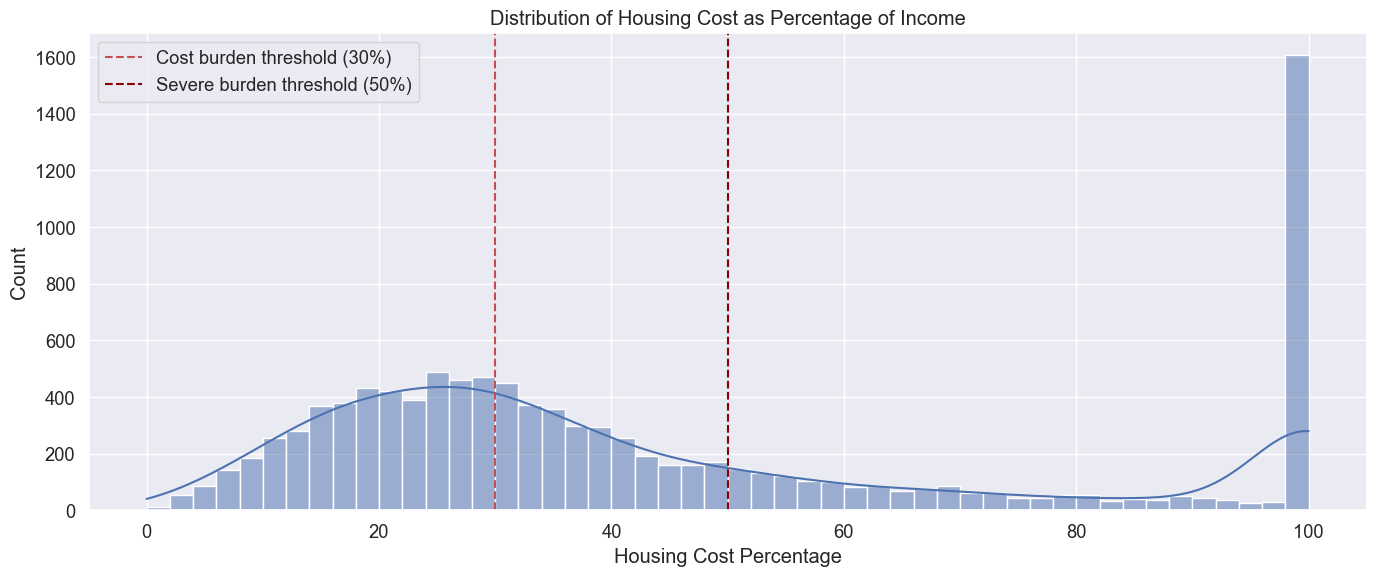

In [20]:
plt.style.use("ggplot")
sns.set(font_scale=1.2)

# 1. Distribution of housing cost percentage with critical thresholds
plt.figure(figsize=(14, 6))
sns.histplot(df_clean["housing_cost_percentage"].clip(0, 100), bins=50, kde=True)
plt.axvline(x=30, color="r", linestyle="--", label="Cost burden threshold (30%)")
plt.axvline(
    x=50, color="darkred", linestyle="--", label="Severe burden threshold (50%)"
)
plt.title("Distribution of Housing Cost as Percentage of Income")
plt.xlabel("Housing Cost Percentage")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


### Cost Burden by Tenure


<Figure size 1600x800 with 0 Axes>

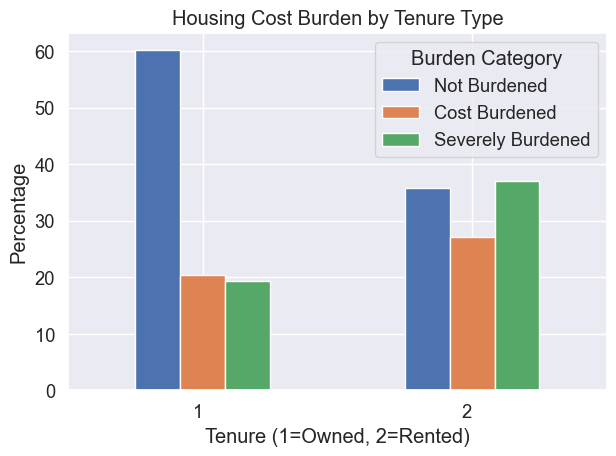

In [21]:
plt.figure(figsize=(16, 8))
cost_burden = df_clean.copy()
cost_burden["burden_category"] = pd.cut(
    cost_burden["housing_cost_percentage"],
    bins=[0, 30, 50, float("inf")],
    labels=["Not Burdened", "Cost Burdened", "Severely Burdened"],
)

tenure_burden = (
    pd.crosstab(
        cost_burden["TENURE"], cost_burden["burden_category"], normalize="index"
    )
    * 100
)

tenure_burden.plot(kind="bar",)
plt.title("Housing Cost Burden by Tenure Type")
plt.xlabel("Tenure (1=Owned, 2=Rented)")
plt.xticks(rotation=0, ha='right')
plt.ylabel("Percentage")
plt.legend(title="Burden Category")
plt.tight_layout()
plt.show()


### Income by Education Level

C:\Users\Bryan\AppData\Local\Temp\ipykernel_16348\2854489626.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(edu_data, labels=edu_level_labels, patch_artist=True)


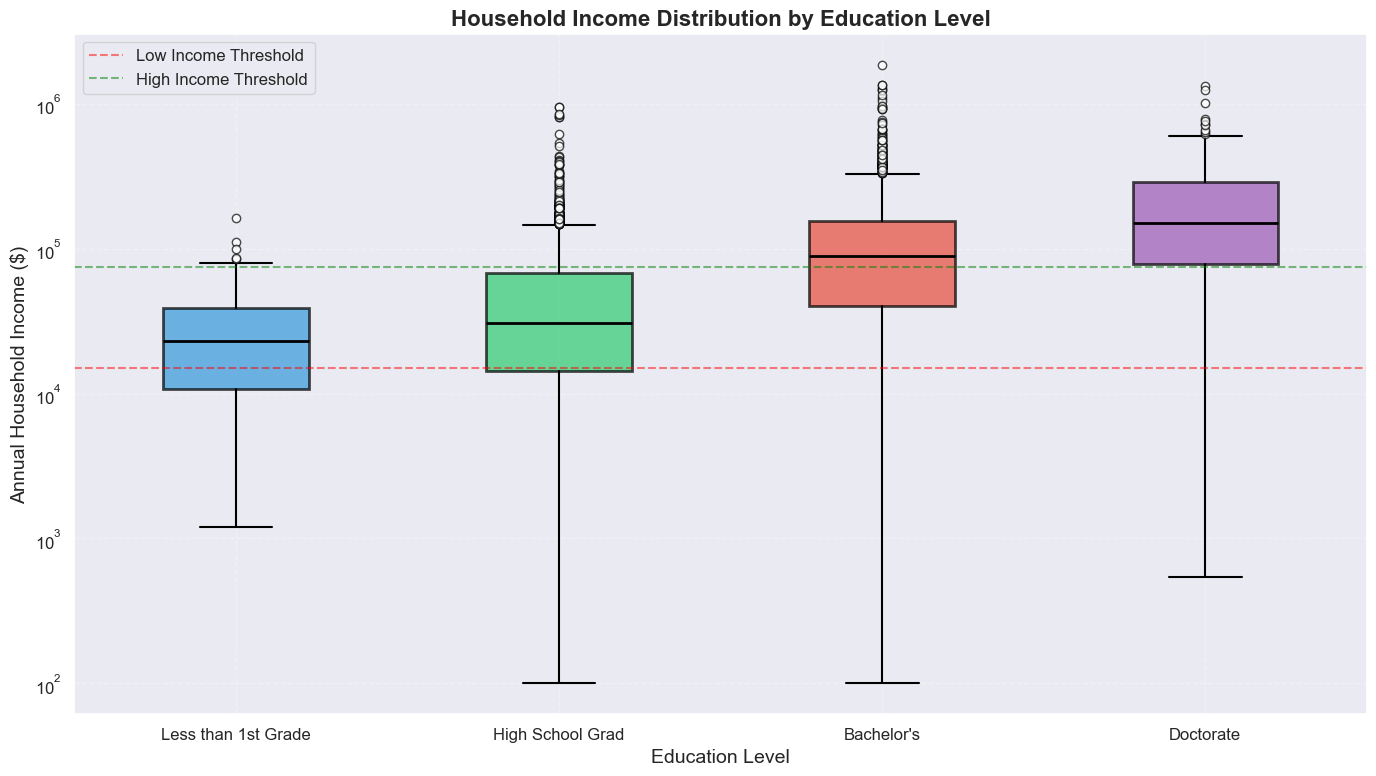

In [22]:
plt.figure(figsize=(14, 8), facecolor='white')

# Less than 1st grade, High school grad, Bachelors, Doctorate
edu_levels = [31, 39, 44, 47]
edu_level_labels = ["Less than 1st Grade", "High School Grad", "Bachelor's", "Doctorate"]

# Collect data for each education level
edu_data = []
for level in edu_levels:
    if level in df_clean["HHGRAD"].unique():
        edu_data.append(df_clean[df_clean["HHGRAD"] == level]["HINCP"])

# Vibrant color palette
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']  

# Create boxplot with custom colors
boxplot = plt.boxplot(edu_data, labels=edu_level_labels, patch_artist=True)

# Color the boxes
for box, color in zip(boxplot['boxes'], colors):
    box.set(color='black', linewidth=2)
    box.set(facecolor=color, alpha=0.7)

# Style other elements
for median in boxplot['medians']:
    median.set(color='black', linewidth=2)

# Color whiskers, caps, median lines
for whisker in boxplot['whiskers']:
    whisker.set(color='black', linewidth=1.5)
for cap in boxplot['caps']:
    cap.set(color='black', linewidth=1.5)
for median in boxplot['medians']:
    median.set(color='black', linewidth=2)
for flier in boxplot['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black', alpha=0.7)

plt.title("Household Income Distribution by Education Level", fontsize=16, fontweight='bold')
plt.ylabel("Annual Household Income ($)", fontsize=14)
plt.xlabel("Education Level", fontsize=14)
plt.yscale("log")
plt.grid(True, linestyle='--', alpha=0.3)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axhline(y=15000, color='red', linestyle='--', alpha=0.5, label='Low Income Threshold')
plt.axhline(y=75000, color='green', linestyle='--', alpha=0.5, label='High Income Threshold')

# Add legend for income thresholds
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


### Correlation Heatmap

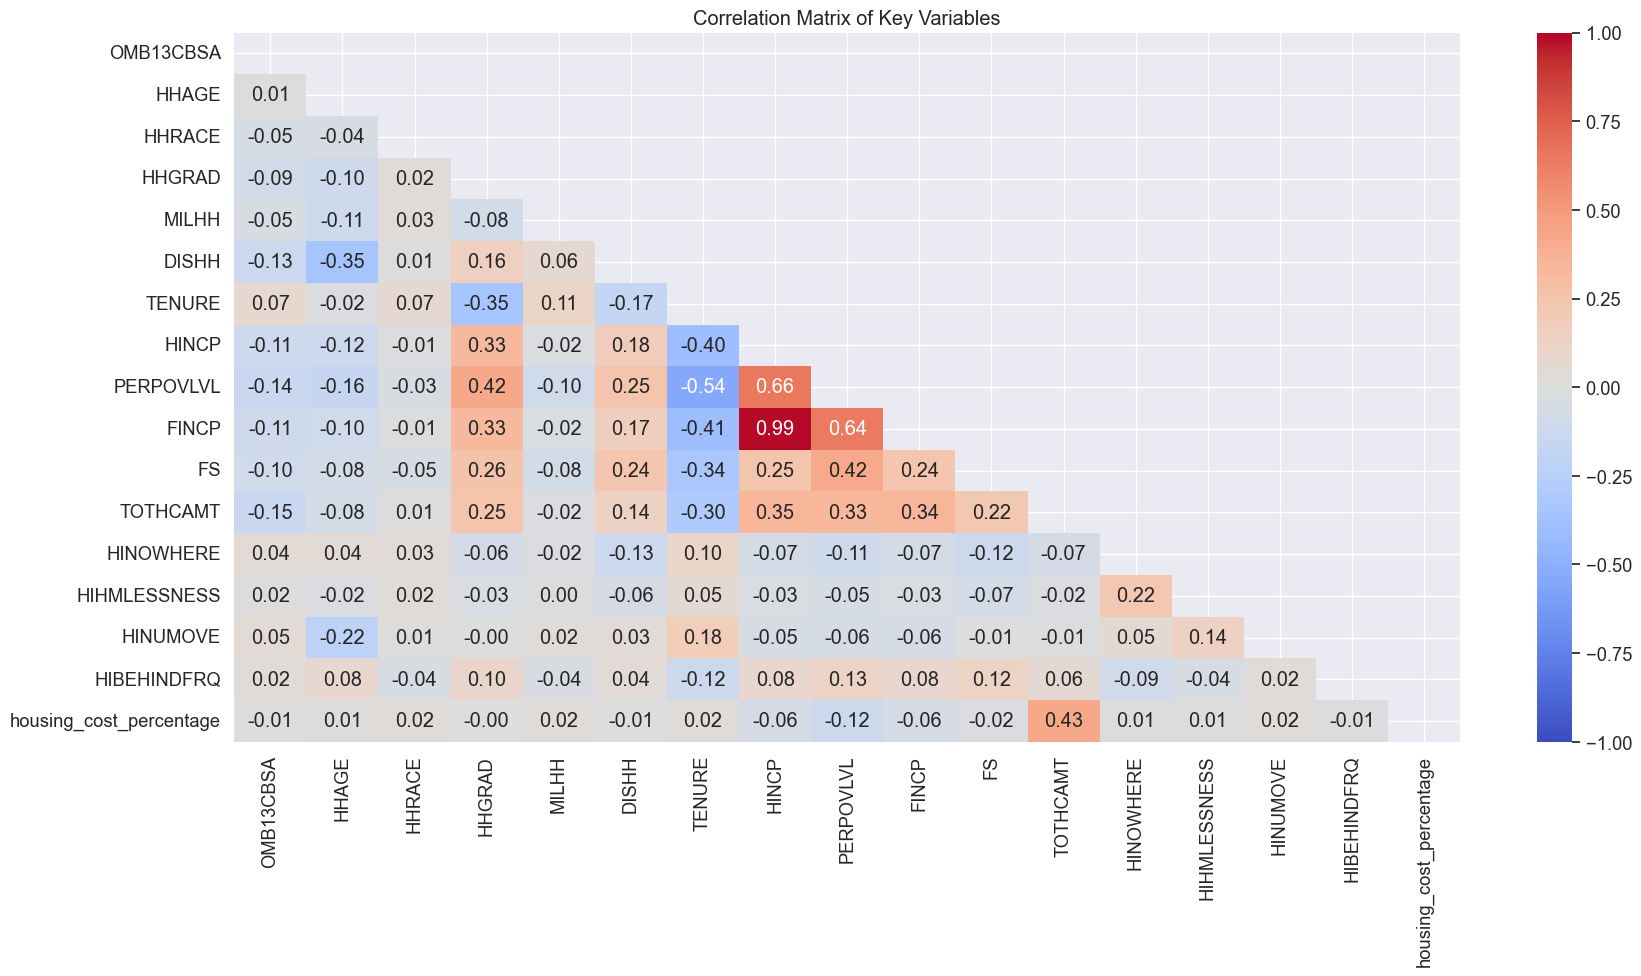

In [23]:
plt.figure(figsize=(18, 10))

corr_matrix = df_clean.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, annot=True, mask=mask, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f"
)
plt.title("Correlation Matrix of Key Variables")
plt.tight_layout()
plt.show()


### Cost Burden by Race

<Figure size 1600x1000 with 0 Axes>

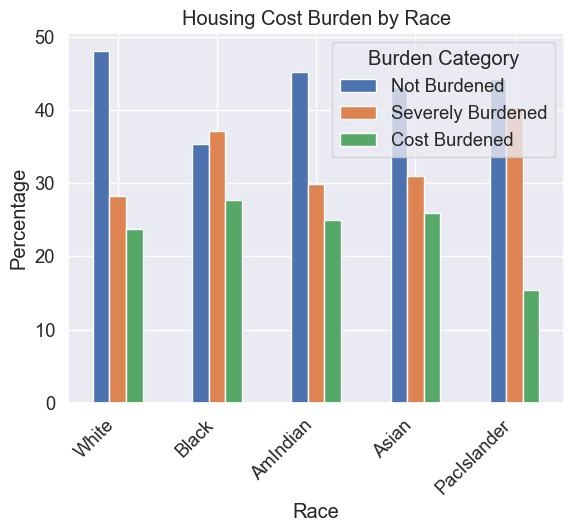

In [24]:
plt.figure(figsize=(16, 10), facecolor='white')
major_races = [1, 2, 3, 4, 5]  # White, Black, Asian
race_labels = {1: "White", 2: "Black", 3: 'AmIndian', 4: "Asian", 5: "PacIslander"}

race_burden_data = []
for race in major_races:
    # Calculate percentage in each burden category for this race
    race_data = cost_burden[cost_burden["HHRACE"] == race]
    burden_counts = race_data["burden_category"].value_counts(normalize=True) * 100
    race_burden_data.append(burden_counts)

race_burden_df = pd.DataFrame(
    race_burden_data, index=[race_labels[r] for r in major_races]
)
race_burden_df.plot(kind="bar")
plt.title("Housing Cost Burden by Race")
plt.xlabel("Race")
plt.ylabel("Percentage")

plt.xticks(rotation=45, ha='right')

plt.legend(title="Burden Category")
plt.show()


In [25]:
df_clean


,OMB13CBSA,HHAGE,HHRACE,HHGRAD,MILHH,DISHH,TENURE,HINCP,PERPOVLVL,FINCP,FS,TOTHCAMT,HINOWHERE,HIHMLESSNESS,HINUMOVE,HIBEHINDFRQ,housing_cost_percentage
1,99998,21,1,39,6,1,2,48000,199,48000,2,1093,0,0,1,6,27.0
6,99998,58,1,34,6,1,2,31400,202,31400,2,1684,0,0,0,6,64.0
11,99998,39,1,40,6,1,2,176700,273,176700,1,3674,2,0,0,6,25.0
17,99998,77,1,39,6,2,2,1200,8,1200,1,340,0,0,0,6,340.0
23,99998,44,1,43,6,2,1,159600,501,159600,2,1952,0,0,0,6,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55637,33100,59,1,44,6,2,2,100000,497,100000,2,2910,0,0,1,6,35.0
55648,26420,68,1,35,6,2,2,40000,108,0,1,1100,0,0,0,6,33.0
55660,99998,61,1,44,6,2,1,72400,362,72400,2,1861,0,0,1,6,31.0
55663,99998,49,1,40,4,2,2,125000,501,125000,2,1580,0,0,0,6,15.0


### Total Housing Cost as Percentage of Income by Location


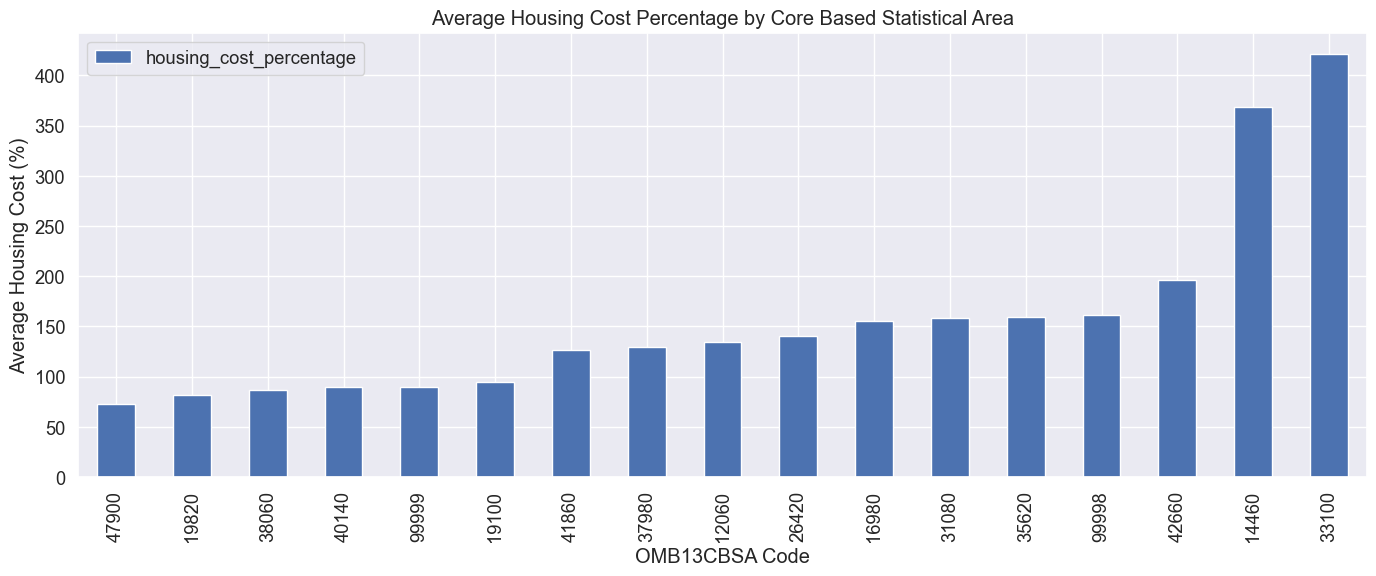

In [26]:
if "OMB13CBSA" in df_clean.columns:
    plt.figure(figsize=(14, 6))
    # Filter to include only high-sample CBSAs
    cbsa_counts = df_clean["OMB13CBSA"].value_counts()
    major_cbsas = cbsa_counts[cbsa_counts > 100].index.tolist()
    cbsa_data = df_clean[df_clean["OMB13CBSA"].isin(major_cbsas)]

    # Calculate mean housing cost percentage by CBSA
    cbsa_cost = (
        cbsa_data.groupby("OMB13CBSA")["housing_cost_percentage"].mean().sort_values()
    )

    cbsa_cost.plot(kind="bar")
    plt.title("Average Housing Cost Percentage by Core Based Statistical Area")
    plt.xlabel("OMB13CBSA Code")
    plt.ylabel("Average Housing Cost (%)")
    plt.legend()
    plt.tight_layout()
    plt.show()


### OMB13CBSA Codes

    New York-Newark-Jersey City, NY-NJ-PA MSA (2013 OMB definition)	                              OMB13CBSA = '35620'
    Los Angeles-Long Beach-Anaheim, CA MSA (2013 OMB definition)	                              OMB13CBSA = '31080'
    Chicago-Naperville-Elgin, IL-IN-WI MSA (2013 OMB definition)	                              OMB13CBSA = '16980'
    Dallas-Fort Worth-Arlington, TX MSA (2013 OMB definition)	                              OMB13CBSA = '19100'
    Philadelphia-Camden-Wilmington,  PA-NJ-DE-MD MSA (2013 OMB definition)	                      OMB13CBSA = '37980'
    Houston-The Woodlands-Sugar Land, TX MSA (2013 OMB definition)	                              OMB13CBSA = '26420'
    Washington-Arlington-Alexandria,  DC-VA-MD-WV MSA (2013 OMB definition)	                      OMB13CBSA = '47900'
    Miami-Fort Lauderdale-West Palm Beach, FL MSA (2013 OMB definition)	                      OMB13CBSA = '33100'
    Atlanta-Sandy Springs-Roswell, GA MSA (2013 OMB definition)	                              OMB13CBSA = '12060'
    Boston-Cambridge-Newton, MA-NH MSA (2013 OMB definition)	                              OMB13CBSA = '14460'
    San Francisco-Oakland-Hayward, CA MSA (2013 OMB definition)	                              OMB13CBSA = '41860'
    Detroit-Warren-Dearborn, MI MSA (2013 OMB definition)	                                      OMB13CBSA = '19820'
    Riverside-San Bernardino-Ontario, CA MSA (2013 OMB definition)	                              OMB13CBSA = '40140'
    Phoenix-Mesa-Scottsdale, AZ MSA (2013 OMB definition)	                                      OMB13CBSA = '38060'
    Seattle-Tacoma-Bellevue, WA MSA (2013 OMB definition)	                                      OMB13CBSA = '42660'


In [27]:
df_clean.head(10)


,OMB13CBSA,HHAGE,HHRACE,HHGRAD,MILHH,DISHH,TENURE,HINCP,PERPOVLVL,FINCP,FS,TOTHCAMT,HINOWHERE,HIHMLESSNESS,HINUMOVE,HIBEHINDFRQ,housing_cost_percentage
1,99998,21,1,39,6,1,2,48000,199,48000,2,1093,0,0,1,6,27.0
6,99998,58,1,34,6,1,2,31400,202,31400,2,1684,0,0,0,6,64.0
11,99998,39,1,40,6,1,2,176700,273,176700,1,3674,2,0,0,6,25.0
17,99998,77,1,39,6,2,2,1200,8,1200,1,340,0,0,0,6,340.0
23,99998,44,1,43,6,2,1,159600,501,159600,2,1952,0,0,0,6,15.0
29,99998,23,1,39,6,1,2,20000,100,20000,2,1138,0,0,0,6,68.0
40,99998,30,1,39,6,2,2,63500,203,63500,1,1740,0,0,0,6,33.0
47,47900,85,4,44,6,1,2,11000,61,11000,2,250,0,0,0,6,27.0
49,99998,54,1,37,6,1,2,11000,71,11000,1,810,1,0,0,1,88.0
60,99998,72,1,39,6,1,2,9400,66,9400,2,850,0,0,0,6,109.0


### One-Hot Encoding


In [28]:
# Find Explanation for Values here:
# https://www.census.gov/data-tools/demo/codebook/ahs/ahsdict.html

# AND more specific definitions on terms used above here:
# https://www2.census.gov/programs-surveys/ahs/2023/2023%20AHS%20Definitions.pdf


def create_one_hot_encoding(df, column, label_map, prefix=None, drop_original=True):
    if prefix is None:
        prefix = column.lower()

    # Create one-hot encoded columns
    dummies = pd.get_dummies(df[column], prefix=prefix).astype(int)

    # Rename columns with descriptive names
    new_column_names = {
        f"{prefix}_{code}": f"{prefix}_{label}"
        for code, label in label_map.items()
        if code in df[column].unique()
    }
    dummies = dummies.rename(columns=new_column_names)

    # Add the one-hot encoded columns to the dataframe
    result_df = pd.concat([df, dummies], axis=1)

    # Optionally drop the original column
    if drop_original:
        result_df = result_df.drop(column, axis=1)

    return result_df


# Define label mappings
race_labels = {
    1: "White",
    2: "Black",
    3: "AmIndian_AlaskaNative",
    4: "Asian",
    5: "Hawaiian_PacIslander",
    6: "White_Black",
    7: "White_AmIndianAlaskaNat",
    8: "White_Asian",
    9: "White_Hawaiian",
    10: "Black_AmIndianAlaskaNat",
    11: "Black_Asian",
    12: "Black_Hawaiian",
    13: "AmIndianAlaskaNat_Asian",
    14: "Asian_Hawaiian",
    15: "White_Black_AmIndianAlaskaNat",
    16: "White_Black_Asian",
    17: "White_AmIndianAlaskaNat_Asian",
    18: "White_Asian_Hawaiian",
    19: "White_Black_AmIndianAlaskaNat_Asian",
    20: "Other_2or3_races",
    21: "Other_4plus_races",
}

# Define education labels
grad_labels = {
    31: "LessThan1stGrade",
    32: "1st_4thGrade",
    33: "5th_6thGrade",
    34: "7th_8thGrade",
    35: "9thGrade",
    36: "10thGrade",
    37: "11thGrade",
    38: "12thGrade",
    39: "HighSchoolGrad",
    40: "SomeCollege",
    41: "VocationalDiploma",
    42: "AssociateOccupational",
    43: "AssociateAcademic",
    44: "BachelorsDegree",
    45: "MastersDegree",
    46: "ProfessionalDegree",
    47: "DoctorateDegree",
}

# Housing tenure status
tenure_labels = {1: "Owned", 2: "Rented", 3: "OccupiedNoRent"}

# Military service status of household members
milhh_labels = {
    1: "1_ActiveDuty",
    2: "1_Veteran",
    3: "2+_ActiveDuty_NoVeterans",
    4: "2+_Veterans",
    5: "2+_Mix_ActiveDuty_Veterans",
    6: "NoMilitary",
}

# Household disability status
dishh_labels = {1: "AtLeastOneDisabled", 2: "NoDisabled"}

# Food security status
fs_labels = {1: "Yes", 2: "No"}

# Persons living in unit because nowhere else to stay
hinowhere_labels = {0: "NoOneinHH", 1: "OnePersonInHH", 2: "TwoPlusInHH"}

# Homelessness experience
hihmlessness_labels = {0: "NoOneinHH", 1: "OnePersonInHH", 2: "TwoPlusInHH"}

# Number of moves
hinumove_labels = {0: "None", 1: "One", 2: "TwoPlus"}

# Frequency behind on housing payments
hibehindfrq_labels = {
    1: "1or2Months",
    2: "SomeMonths",
    3: "AlmostEveryMonth",
    4: "EveryMonth",
    5: "MonthsNotReported",
    6: "NotBehind",
}


# Apply one-hot encoding to both columns
df_encoded = df_clean.copy()
df_encoded = create_one_hot_encoding(df_encoded, "HHRACE", race_labels, prefix="race")
df_encoded = create_one_hot_encoding(df_encoded, "HHGRAD", grad_labels, prefix="edu")
df_encoded = create_one_hot_encoding(
    df_encoded, "TENURE", tenure_labels, prefix="tenure"
)
df_encoded = create_one_hot_encoding(df_encoded, "MILHH", milhh_labels, prefix="mil")
df_encoded = create_one_hot_encoding(df_encoded, "DISHH", dishh_labels, prefix="dis")
df_encoded = create_one_hot_encoding(df_encoded, "FS", fs_labels, prefix="fs")
df_encoded = create_one_hot_encoding(
    df_encoded, "HINOWHERE", hinowhere_labels, prefix="nowhereToGo"
)
df_encoded = create_one_hot_encoding(
    df_encoded, "HIHMLESSNESS", hihmlessness_labels, prefix="expHomelessness"
)
df_encoded = create_one_hot_encoding(
    df_encoded, "HINUMOVE", hinumove_labels, prefix="moves"
)
df_encoded = create_one_hot_encoding(
    df_encoded, "HIBEHINDFRQ", hibehindfrq_labels, prefix="behindPayments"
)

# Display examples of the encodings
# print("Sample of race encoding:")
# race_cols = [col for col in df_encoded.columns if col.startswith("race_")]
# print(df_encoded[race_cols].head(3))

# print("\nSample of education encoding:")
# edu_cols = [col for col in df_encoded.columns if col.startswith("edu_")]
# print(df_encoded[edu_cols].head(3))

df_encoded.to_csv(
    "4-onehot-encoded.csv",
)


In [29]:
df_encoded


,OMB13CBSA,HHAGE,HINCP,PERPOVLVL,FINCP,TOTHCAMT,housing_cost_percentage,race_White,race_Black,race_AmIndian_AlaskaNative,...,expHomelessness_TwoPlusInHH,moves_None,moves_One,moves_TwoPlus,behindPayments_1or2Months,behindPayments_SomeMonths,behindPayments_AlmostEveryMonth,behindPayments_EveryMonth,behindPayments_MonthsNotReported,behindPayments_NotBehind
1,99998,21,48000,199,48000,1093,27.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
6,99998,58,31400,202,31400,1684,64.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
11,99998,39,176700,273,176700,3674,25.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
17,99998,77,1200,8,1200,340,340.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
23,99998,44,159600,501,159600,1952,15.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55637,33100,59,100000,497,100000,2910,35.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
55648,26420,68,40000,108,0,1100,33.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
55660,99998,61,72400,362,72400,1861,31.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
55663,99998,49,125000,501,125000,1580,15.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


<Figure size 1600x1000 with 0 Axes>

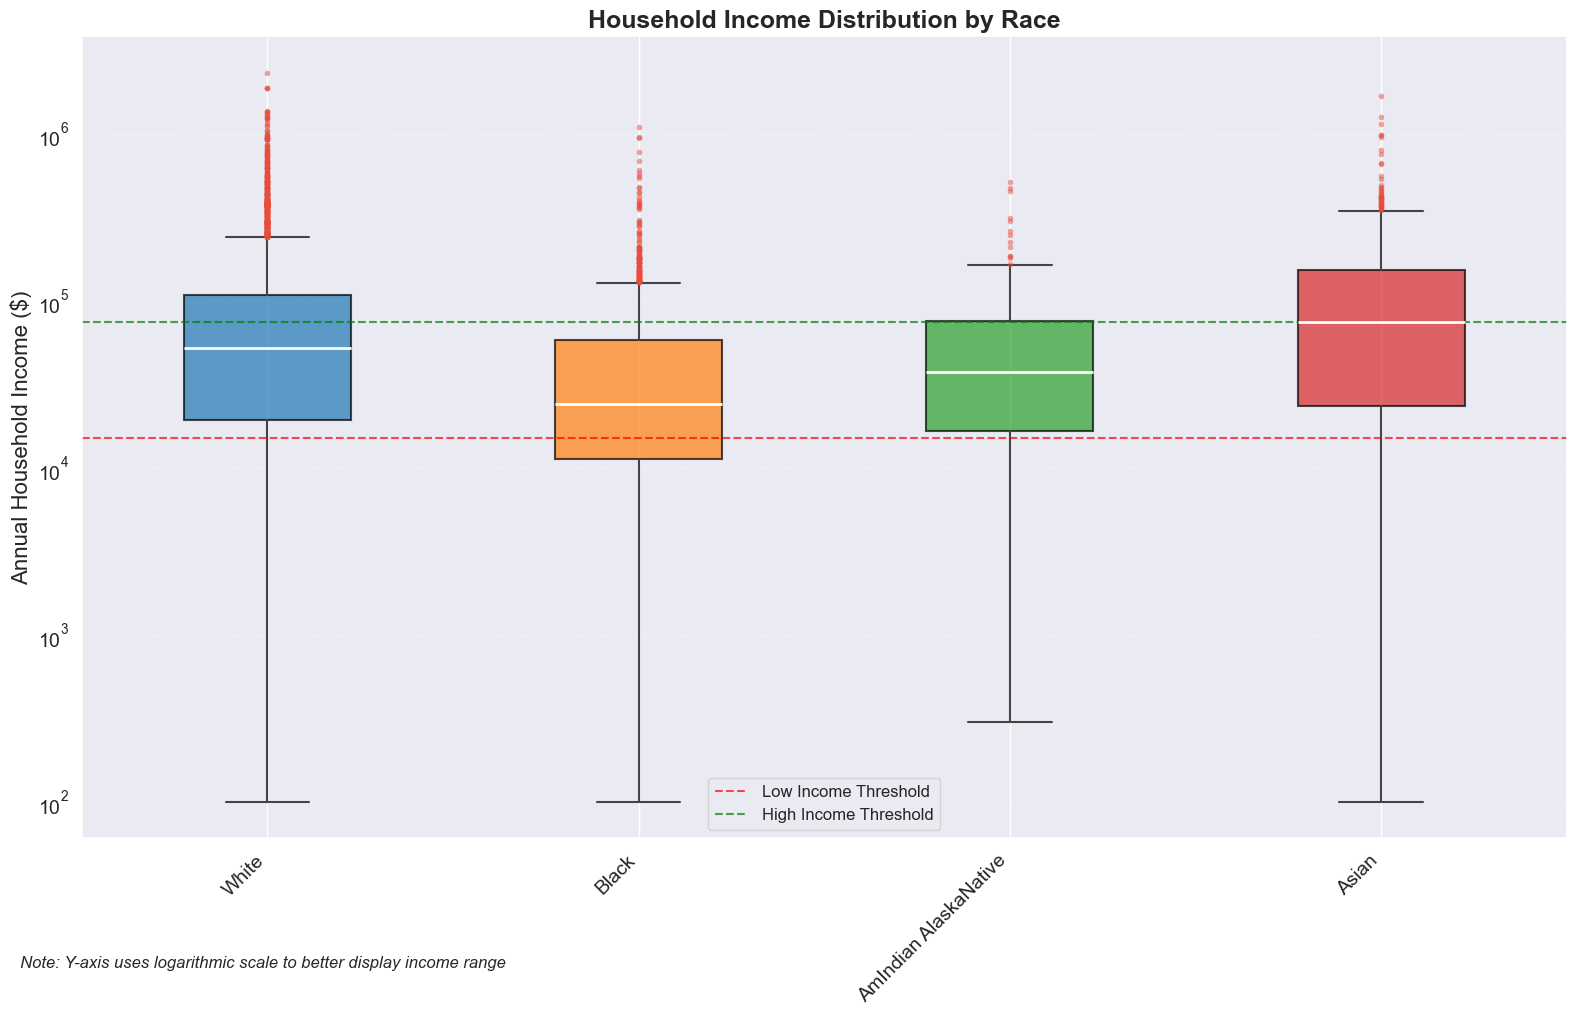

In [30]:
plt.figure(figsize=(16, 10), facecolor='white')

# Get race columns and data
race_cols = [col for col in df_encoded.columns if col.startswith('race_')]
race_data = []
race_labels = []

for col in race_cols:
    subset = df_encoded[df_encoded[col] == 1]['HINCP']
    if len(subset) > 100:  # Only include races with sufficient data
        race_data.append(subset)
        # Clean up labels by removing prefix and underscores
        label = col.replace('race_', '').replace('_', ' ')
        race_labels.append(label)

# Create a custom color palette - more distinctive than viridis
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# If we have more categories than colors, cycle through them
colors = colors * (len(race_data) // len(colors) + 1)

# Create the boxplot with custom styling and explicitly set the labels
fig, ax = plt.subplots(figsize=(16, 10))
boxplot = ax.boxplot(race_data, patch_artist=True)

# Color each box
for box, color in zip(boxplot['boxes'], colors[:len(race_data)]):
    box.set(color='black', linewidth=1.5)
    box.set(facecolor=color, alpha=0.7)

# Style whiskers, caps, fliers and median lines
for whisker in boxplot['whiskers']:
    whisker.set(color='#444444', linewidth=1.5)
for cap in boxplot['caps']:
    cap.set(color='#444444', linewidth=1.5)
for median in boxplot['medians']:
    median.set(color='white', linewidth=2)
for flier in boxplot['fliers']:
    flier.set(marker='o', markerfacecolor='#e74c3c', markeredgecolor='none', markersize=4, alpha=0.5)

# Set titles and labels with improved styling
plt.title('Household Income Distribution by Race', fontsize=18, fontweight='bold')
plt.ylabel('Annual Household Income ($)', fontsize=16)
plt.yscale('log')  # Log scale makes income distribution easier to visualize
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Explicitly set x-tick positions and labels
ax.set_xticks(range(1, len(race_labels) + 1))
ax.set_xticklabels(race_labels, fontsize=14, rotation=45, ha='right')

# Set y ticks with larger font size
plt.yticks(fontsize=14)

# Add income bracket lines 
plt.axhline(y=15000, color='red', linestyle='--', alpha=0.7, label='Low Income Threshold')
plt.axhline(y=75000, color='green', linestyle='--', alpha=0.7, label='High Income Threshold')

# Add legend for income thresholds
plt.legend(fontsize=12)

# Add annotations
plt.figtext(0.02, 0.02, 'Note: Y-axis uses logarithmic scale to better display income range', 
            fontsize=12, style='italic')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make extra space for labels
plt.show()
